In [1]:
from keras import models, layers


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

val_images = train_images[:10000]
x_train = train_images[10000:]
val_labels = train_labels[:10000]
y_train = train_labels[10000:]

11501568/11490434 [==============================] - 137s 12us/step


In [6]:
model.compile(optimizer= 'rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
history = model.fit(x_train, y_train, epochs= 20, batch_size= 64, validation_data= (val_images, val_labels))

Epoch 1/20
782/782 [==============================] - 41s 51ms/step - loss: 0.2009 - accuracy: 0.9359 - val_loss: 0.0772 - val_accuracy: 0.9768
Epoch 2/20
782/782 [==============================] - 42s 54ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0510 - val_accuracy: 0.9855
Epoch 3/20
782/782 [==============================] - 36s 46ms/step - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0448 - val_accuracy: 0.9871
Epoch 4/20
782/782 [==============================] - 34s 44ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0466 - val_accuracy: 0.9885
Epoch 5/20
782/782 [==============================] - 37s 47ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0423 - val_accuracy: 0.9899
Epoch 6/20
782/782 [==============================] - 33s 43ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0929 - val_accuracy: 0.9823
Epoch 7/20
782/782 [==============================] - 39s 49ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0457 - val_accuracy:

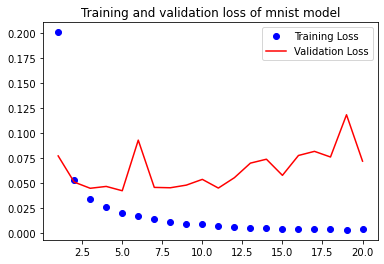

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')
plt.title('Training and validation loss of mnist model')
plt.legend()
plt.savefig('Results/6_1/Loss.png');

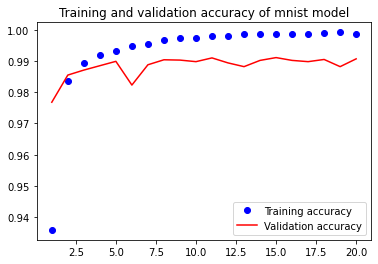

In [8]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and validation accuracy of mnist model')
plt.legend()
plt.savefig('Results/6_1/Accuracy.png');

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.compile(optimizer= 'rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.fit(train_images, train_labels, epochs= 9, batch_size= 64)

Epoch 1/9
938/938 [==============================] - 40s 41ms/step - loss: 0.1714 - accuracy: 0.9461
Epoch 2/9
938/938 [==============================] - 45s 48ms/step - loss: 0.0494 - accuracy: 0.9851
Epoch 3/9
938/938 [==============================] - 41s 44ms/step - loss: 0.0347 - accuracy: 0.9891
Epoch 4/9
938/938 [==============================] - 46s 50ms/step - loss: 0.0257 - accuracy: 0.9922
Epoch 5/9
938/938 [==============================] - 50s 53ms/step - loss: 0.0207 - accuracy: 0.9937
Epoch 6/9
938/938 [==============================] - 41s 44ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 7/9
938/938 [==============================] - 56s 60ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 8/9
938/938 [==============================] - 48s 51ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 9/9
938/938 [==============================] - 40s 42ms/step - loss: 0.0104 - accuracy: 0.9969


In [10]:
model.save('Results/6_1/mode.h5')

In [11]:
result = model.evaluate(test_images, test_labels)
print(f'The model result for the test data is loss {result[0]} and accuracy {result[1]}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0368 - accuracy: 0.9905
The model result for the test data is loss 0.03683258220553398 and accuracy 0.9904999732971191


In [12]:
import numpy as np
import pandas as pd
preds = model.predict(test_images)
pred_class = np.argmax(preds, axis= 1)
act = np.argmax(test_labels, axis= 1)
pred_df = pd.DataFrame({'Actual':act, 'Predicted':pred_class})
pred_df

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [13]:
pred_df.to_csv('Results/6_1/predictions.csv')